In [3]:
import pandas as pd

In [4]:
#lendo os arquivos
df1 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/2be7520c-94cd-463f-8432-d580d0810344/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [5]:
#juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#5 últimas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Verificando o tipo dos dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
#alterando o tipo de dados
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
#Verificando se tem valores faltando
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#Substituindo os valores faltes pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [14]:
#verificando
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [16]:
#Apagando as linhas com os valores nulos
df.dropna(how="all", inplace=True)

Criando Colunas

In [17]:
#Criando coluna de Receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#Criando coluna Recita/Vendas
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [21]:
#Descobrindo maior Receita
df["Receita"].max()

3544.0

In [22]:
#Menor Receita
df["Receita"].min()

3.34

In [23]:
#nlarges : Retorna um Top n maiores valores,definido da coluna que eu quiser
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [24]:
#nsmallest : Retorna um Top n menores valores, definido da coluna que eu quiser
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [25]:
#Agrupamento por cidade. Nesse caso somatório de Receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [26]:
#Ordenando um conjunto de dados. No Ex do maior para o menor, mostrando os 10 primeiros
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Datas

In [27]:
#Transformando a coluna de Datas em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [28]:
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [29]:
#Transformando a coluna Datas em tipo Data
df["Data"] = pd.to_datetime(df["Data"])

In [30]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [31]:
#Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [32]:
#Criando uma coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [33]:
#Pega uma amostra de n linhas
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2.0,2019
194,Salvador,2019-01-02,156.47,1035,1,156.47,1.0,2019
77,Aracaju,2018-01-01,24.10,1522,1,24.10,1.0,2018
112,Natal,2019-01-02,43.00,1036,3,129.00,3.0,2019
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019


In [34]:
#Pegando o mês e o dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [35]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
40,Salvador,2019-02-13,161.87,1036,3,485.61,3.0,2019,2,13
145,Salvador,2019-01-02,84.62,1034,2,169.24,2.0,2019,1,2
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2


In [36]:
#Achando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [37]:
#Diferença de dias. No Ex. diferença do dia da venda para a primeira venda
df["diferença_dias"] = df["Data"]-df["Data"].min()

In [38]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days
38,Fortaleza,2019-01-01,35.09,1004,4,140.36,4.0,2019,1,1,365 days
55,Natal,2019-01-08,859.00,854,4,3436.00,4.0,2019,1,8,372 days


In [39]:
#Crinado coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [40]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019,1,1,365 days,1
41,Salvador,2019-02-13,9.86,1035,2,19.72,2.0,2019,2,13,408 days,1
101,Natal,2019-01-02,32.28,1035,3,96.84,3.0,2019,1,2,366 days,1


In [41]:
#Filtrando por ano e mês. No Ex. Vendasd em 2019 no mês de Março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [42]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


Visualização de Dados

In [43]:
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

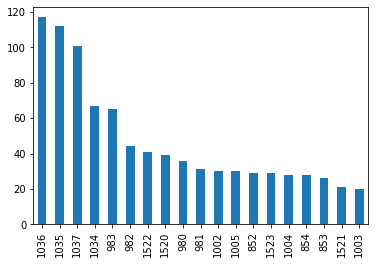

In [44]:
#Gráfico de Barras
df["LojaID"].value_counts(ascending = False).plot.bar()

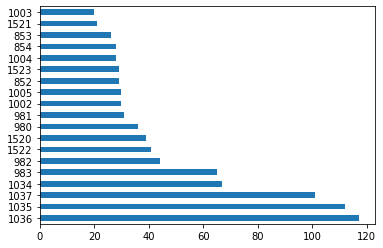

In [45]:
#Gráfico Barras Horizontal
df["LojaID"].value_counts(ascending = False).plot.barh()

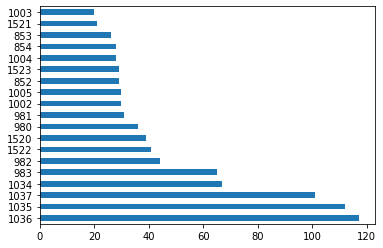

In [47]:
df["LojaID"].value_counts().plot.barh()

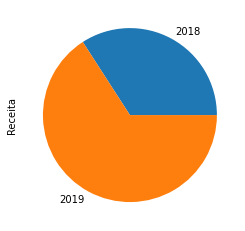

In [48]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [50]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

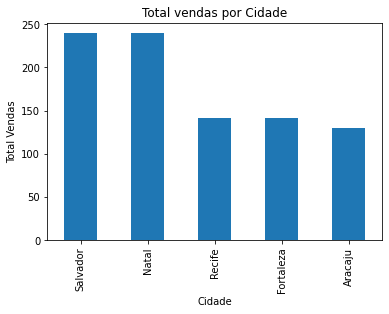

In [52]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

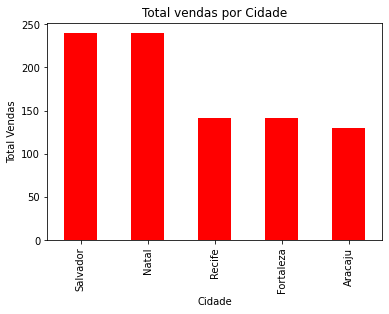

In [53]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color ="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [54]:
#Alterando o estilo
plt.style.use("ggplot")

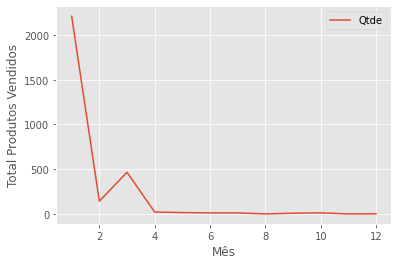

In [56]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [57]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [58]:
#Selecionando apenas venda de 2019
df_2019=df[df["Ano_Venda"]==2019]

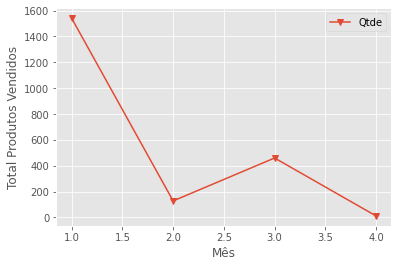

In [64]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

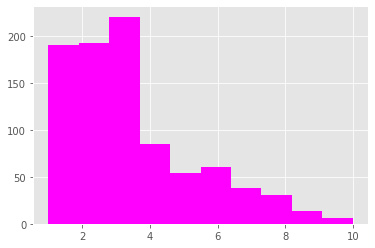

In [62]:
#Histograma
plt.hist(df["Qtde"],color="magenta");

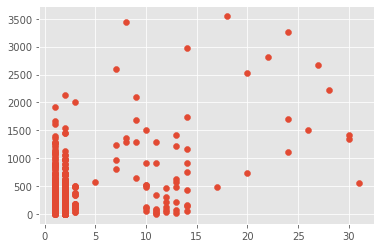

In [63]:
#Gráfico de Dispersão
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

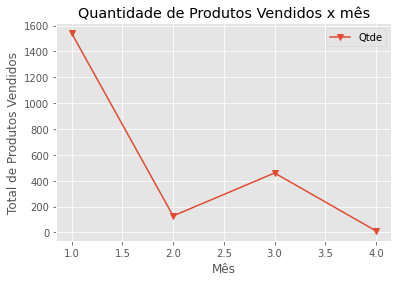

In [65]:
#Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.savefig("grafico  TDE X MES.png")